In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

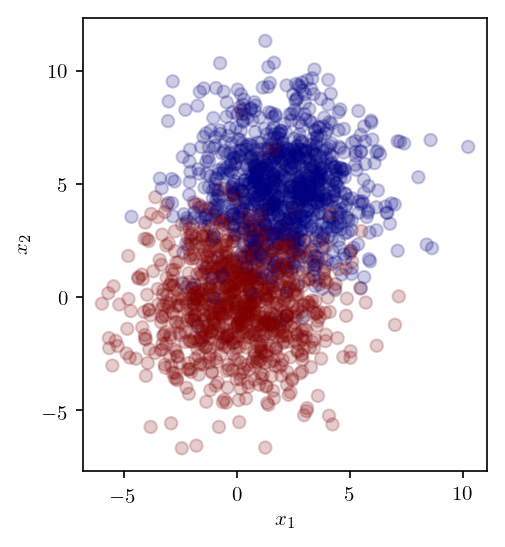

In [2]:
# Generate some random data blobs
x1 = np.array([2.0, 5.0]) # coordinates of the centre of the first distribution
x2 = np.array([0.0, 0.0]) # coordinates of the centre of the second distribution
sig1 = sig2 = 2 # standard deviation

N = 1000 # number of data points of each category

np.random.seed(2)
d1 = np.random.normal(0,sig1,(N,2)) + x1 # generating data
d2 = np.random.normal(0,sig2,(N,2)) + x2

d1 = np.hstack((d1,np.zeros((N,1)))) # assigning categories
d2 = np.hstack((d2,np.ones((N,1))))

data = np.vstack((d1,d2)) # gathering the data
np.random.shuffle(data)

x = np.hstack((data[:,:-1], np.ones((2*N,1)))) # splitting into independent variables (with ones for bias) ...
t = data[:,-1] # ... and dependent variable

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(4,4), dpi=150)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.yticks(np.arange(-5, 15, step=5))
plt.gca().set_aspect('equal')
plt.scatter(x[:,0], x[:,1], c=t, cmap='jet', alpha=0.2) # plot with categories in colour

In [3]:
# Defining sigmoid and cross-entropy functions
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def cross_entropy(t, y):
    return -1.0 / len(t) * ( np.dot(t,np.log(y)) + np.dot(1-t,np.log(1-y)) )

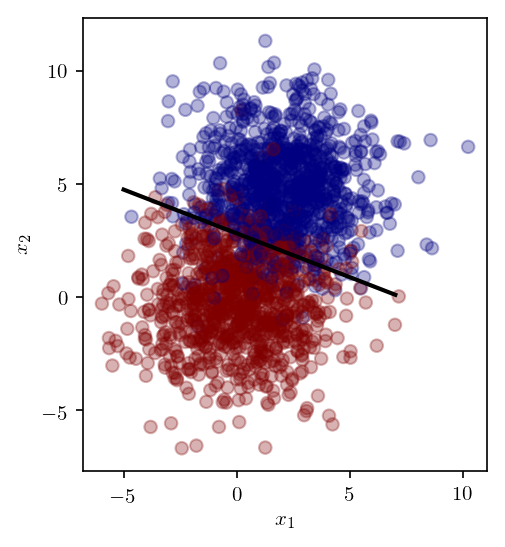

In [4]:
# Performing gradient descent
learning_rate = 0.1
cutoff = 1e-5
w = np.array([-3.5, -2, 6]) # initializing weights
while(True):
    y =  sigmoid(np.sum(w * x, axis=1))
    grad = 1.0 / len(t) * np.sum(np.expand_dims(y-t,1) * x, 0) # calculating gradient
    w -= grad * learning_rate # changing the weights according to the gradient and learning rate
    if np.linalg.norm(grad) < cutoff: # checking the termination condition
        break

plt.figure(figsize=(4,4), dpi=150)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.yticks(np.arange(-5, 15, step=5))
plt.gca().set_aspect('equal')
plt.scatter(x[:,0], x[:,1], c=t, cmap='jet', alpha=0.3) # plotting the data
plt.plot([-5, 7], [(-w[2]-w[0]*-5)/w[1], (-w[2]-w[0]*7)/w[1]], 'k-', lw=2) # plotting the decision boundary

In [5]:
# Checking the accuracy of predictions
y =  sigmoid(np.sum(w * x, axis=1))
predictions = [1 if yi >= 0.5 else 0 for yi in y] # using 0.5 as threshold for predicting categories 
np.mean(predictions == t) # comparing with actual categories

0.911